# Importy

In [42]:
import numpy as np
import pandas as pd

# Import danych

In [43]:
#Load the data from the file dane.csv to DataFrame and first row as header
df = pd.read_csv('dane.csv', header=0)

# Jak wyglądają dane

In [44]:
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
df.tail()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202
4857376,1617148800,58767.75,58778.18,58755.97,58778.18,2.712831,159417.751000,58764.349363


# Oznaczenia
- Open -> Cena pierwszej transakcji w danym okresie czasu
- High -> Najwyższa cena w danym okresie czasu
- Low -> Najniższa cena w danym okresie czasu
- Close -> Cena ostatniej transakcji w danym okresie czasu 
- Volume_(BTC) -> łączna ilość wymienionych bitcoinów w danym okresie czasu
- Volume_(Currency) -> łączna kwota wszystkich transakcji w danym okresie czasu.
- Weighted_Price -> średnia cena bitcoina w danym okresie czasu

# Podstawowe info o danych

In [46]:
df.shape

(4857377, 8)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857377 entries, 0 to 4857376
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 296.5 MB


In [48]:
df.describe()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,4.857377e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06
mean,1.471301e+09,6.009024e+03,6.013357e+03,6.004488e+03,6.009014e+03,9.323249e+00,4.176284e+04,6.008935e+03
std,8.428019e+07,8.996247e+03,9.003521e+03,8.988778e+03,8.996360e+03,3.054989e+01,1.518248e+05,8.995992e+03
min,1.325318e+09,3.800000e+00,3.800000e+00,1.500000e+00,1.500000e+00,0.000000e+00,0.000000e+00,3.800000e+00
25%,1.398179e+09,4.438600e+02,4.440000e+02,4.435200e+02,4.438600e+02,4.097759e-01,4.521422e+02,4.438306e+02
50%,1.471428e+09,3.596970e+03,3.598190e+03,3.595620e+03,3.597000e+03,1.979811e+00,3.810124e+03,3.596804e+03
75%,1.544288e+09,8.627270e+03,8.632980e+03,8.621090e+03,8.627160e+03,7.278216e+00,2.569821e+04,8.627637e+03
max,1.617149e+09,6.176356e+04,6.178183e+04,6.167355e+04,6.178180e+04,5.853852e+03,1.390067e+07,6.171621e+04


# Ile wieszy nie zawiera danych

In [49]:
#Count how many rows contain NaN
df.isnull().sum()

Timestamp                  0
Open                 1243608
High                 1243608
Low                  1243608
Close                1243608
Volume_(BTC)         1243608
Volume_(Currency)    1243608
Weighted_Price       1243608
dtype: int64

# Czy jeśli wiersz nie zawiera jakiś danych to nie zawiera danych od Open do Weighted_Price

In [50]:
df.isnull().sum(axis=1).unique()

array([0, 7], dtype=int64)

Zatem odpowiedź na to pytanie jest pozytywna

# Ile procent danych stanowią wiersze z brakującymi danymi

In [51]:
#Count how Many rows contain NaN and count how many percent of all rows it is
df.isnull().sum() / df.shape[0] * 100

Timestamp             0.00000
Open                 25.60246
High                 25.60246
Low                  25.60246
Close                25.60246
Volume_(BTC)         25.60246
Volume_(Currency)    25.60246
Weighted_Price       25.60246
dtype: float64

# Macierz korelacji

In [52]:
#Create corelation matrix as plot including index column 'Timestamp'
df.corr().style.background_gradient(cmap='coolwarm')

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,1.000000,0.650719,0.650644,0.650803,0.650714,-0.103926,0.228190,0.650737
Open,0.650719,1.000000,0.999999,0.999999,0.999999,-0.051860,0.344074,0.999999
High,0.650644,0.999999,1.000000,0.999998,0.999999,-0.051717,0.344498,0.999999
Low,0.650803,0.999999,0.999998,1.000000,0.999999,-0.052040,0.343541,1.000000
Close,0.650714,0.999999,0.999999,0.999999,1.000000,-0.051877,0.344036,1.000000
Volume_(BTC),-0.103926,-0.051860,-0.051717,-0.052040,-0.051877,1.000000,0.352038,-0.051887
Volume_(Currency),0.228190,0.344074,0.344498,0.343541,0.344036,0.352038,1.000000,0.344010
Weighted_Price,0.650737,0.999999,0.999999,1.000000,1.000000,-0.051887,0.344010,1.000000


# Przekształcenie wartości 'Timestamp' na datę

In [53]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')
df['Timestamp'] = df['Timestamp'].dt.floor('min')
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,2011-12-31 07:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-12-31 07:54:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-12-31 07:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-12-31 07:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Przedstwienie cen bitcoina w czasie

<Axes: xlabel='Timestamp'>

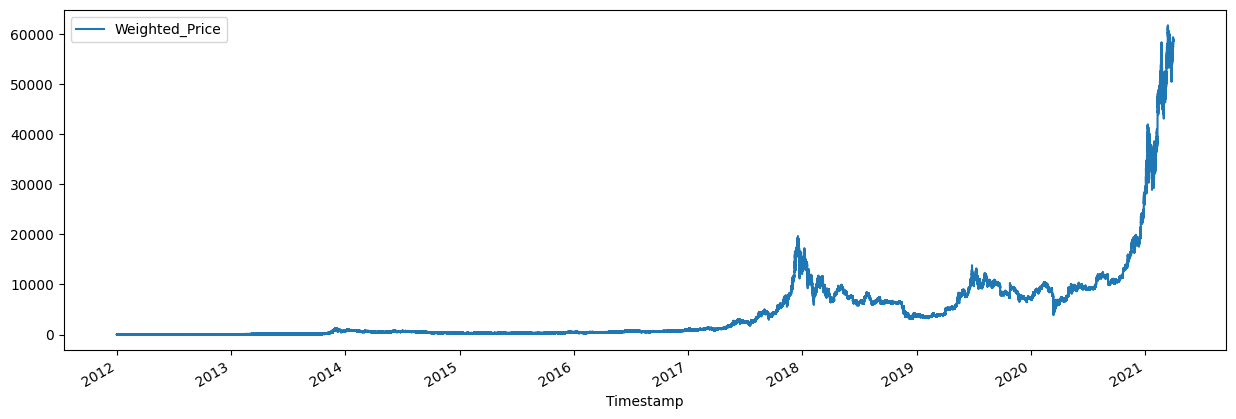

In [54]:
#Create plot with column 'Timestamp' as x-axis and 'Weighted_Price' as y-axis
df.plot(x='Timestamp', y='Weighted_Price', figsize=(15, 5))

# Uzupełnianie missing data
Skoro dane są sekwencyjne najlepiej je będzie uzupełnić wcześniejszą wartością

In [56]:
#Fill missing data using data before missing data
df = df.fillna(method='ffill')
df

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,2011-12-31 07:53:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
2,2011-12-31 07:54:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
3,2011-12-31 07:55:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
4,2011-12-31 07:56:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
...,...,...,...,...,...,...,...,...
4857372,2021-03-30 23:56:00,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,2021-03-30 23:57:00,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,2021-03-30 23:58:00,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,2021-03-30 23:59:00,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202
